In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
from functools import reduce
import sys
sys.path.append(os.environ['ROOT_DIR'])
from setting import *

import matplotlib.pylab as plt
import pandas as pd
import random
import seaborn as sns
from tqdm import *
import numpy as np

from src.data.helper import *
from src.model.base_data import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Filter/Concatenate all the data into one file.

- 1) Install the good package (anaconda, tqdm, seaborn)
On the command line : pip install tqdm seaborn
  ``` 
  pip install tqdm 
  pip install seaborn
  pip install rpy2 (You have to install R first)
  
  ```
If u are on the VPN, add : 

```
  pip install seaborn --proxy=thproxy.internet.point:8080
```

- 2) Move up your raw data to the **raw folder**.
It should contain at least: 

    - s2ds1.txt
    - s2ds2.txt
    - s2ds3.txt
    - s2ds4.txt
    - s2ds1_update.txt

- 3) In the command line, cd into the root of the directory.
Then, first export the ROOT_DIR environment variable which is
going to locate the path for this dir on your computer.
```
export ROOT_DIR=$PWD
```
Once, this is done, you can next generate the main data file
we are going use later for modelling.
``` 
 python src/data/gen_data.py
```
It is going to take ~10 min. The cleaned data is now in the processed folder of the data folder. 

There are two new files in the processed folder:
- processed_data.csv
- summary_table.csv

To explore the content, you can use the RoyalMail class located in the base_data.py file in the src/model folder.

# Royal Mail class 

This class provide utilities to explore the whole dataset.
Each method is documented in the src/model/base_data.py file.

In [8]:
from src.model.base_data import RoyalMail

In [6]:
rm = RoyalMail()

 90%|█████████ | 93/103 [00:17<00:01,  5.39it/s]


In [13]:
# For instance
print('Number of MC {}'.format(rm.nMCs))
print('Number of DO {}'.format(rm.nDOs))
print('Number of stream {}'.format(len(rm.streams)))

Number of MC 38
Number of DO 1278
Number of stream 11


In [14]:
# To get a sumarry table for all combination of (MC,DO,stream)
rm.summary_table.head()

cnt_mean  cnt_max  cnt_min  \
MC                   DO        stream                                   
aberdeen mail centre altens do T0001    5202.077778  26849.0      0.0   
                               T0003    2415.901389   6377.0      0.0   
                               T0030    9486.218359  23377.0      0.0   
                               T0064     316.320781   1772.0      0.0   
                               T0076   33296.880556  71242.0      0.0   

                                            cnt_std  cnt_count    date_min  \
MC                   DO        stream                                        
aberdeen mail centre altens do T0001    3085.948567        720  2014-04-06   
                               T0003     860.488245        720  2014-04-06   
                               T0030    3253.344196        719  2014-04-06   
                               T0064     145.848846        717  2014-04-06   
                               T0076   10357.972995        720  2014-04-06   

                                         date_max  
MC                   DO        stream              
aberdeen mail centre altens do T0001   2016-06-30  
                               T0003   2016-06-30  
                               T0030   2016-06-30  
                               T0064   2016-06-30  
                               T0076   2016-06-30

In [16]:
rm.summary_table.loc[('aberdeen mail centre','altens do','T0001')]

cnt_mean        5202.08
cnt_max           26849
cnt_min               0
cnt_std         3085.95
cnt_count           720
date_min     2014-04-06
date_max     2016-06-30
Name: (aberdeen mail centre, altens do, T0001), dtype: object

# Mail Center class

This class provide different method to look at the scale of one mail center.
Again all, the methods are documented in the file. 

I recommend you specify dump=True the first time you are looking at a specific mail center for faster reused in the future.

In [18]:
aberdeen = MailCenter('aberdeen mail centre',dump=True)

**************************************************
Extracting the data in processed


In [24]:
# you can access the df 
aberdeen.df.head()
# gen the list of dos attached to him
aberdeen.dos
# Simply get the name of the mail centre
aberdeen.name
# ...

'aberdeen_mail_centre'

In [28]:
# Gen stats for the streams in a specific DO 
aberdeen.gen_DO_stats('altens do')

,count,mean,std,min,25%,50%,75%,max
T0076,720.0,33296.880556,10357.972995,0.0,28714.50,34842.5,39542.75,71242.0
T0030,719.0,9486.218359,3253.344196,0.0,7599.00,9255.0,11354.50,23377.0
T0001,720.0,5202.077778,3085.948567,0.0,3679.00,4418.5,5645.00,26849.0
T0003,720.0,2415.901389,860.488245,0.0,1886.75,2396.5,2980.75,6377.0
T0093,719.0,2163.657858,749.091186,0.0,1771.50,2078.0,2423.50,5770.0
T0092,719.0,1561.485396,540.607210,0.0,1262.50,1500.0,1772.50,4221.0
T0079,721.0,456.815534,227.823727,0.0,314.00,416.0,568.00,2337.0
T0094,719.0,377.682893,137.337180,0.0,303.00,359.0,426.00,1090.0
T0064,717.0,316.320781,145.848846,0.0,291.00,344.0,386.00,1772.0
T0095,719.0,279.994437,100.915475,0.0,228.00,275.0,321.50,811.0


In [36]:
# Get the time serie for a specific DO, stream
aberdeen.get_DO('altens do',target='stream',name='T0076').head()

,cnt
2014-04-06,0.0
2014-04-07,37676.0
2014-04-08,14883.0
2014-04-09,40847.0
2014-04-10,48222.0


In [37]:
# Plot the ts for different streams

100%|██████████| 3/3 [00:01<00:00,  2.84it/s]


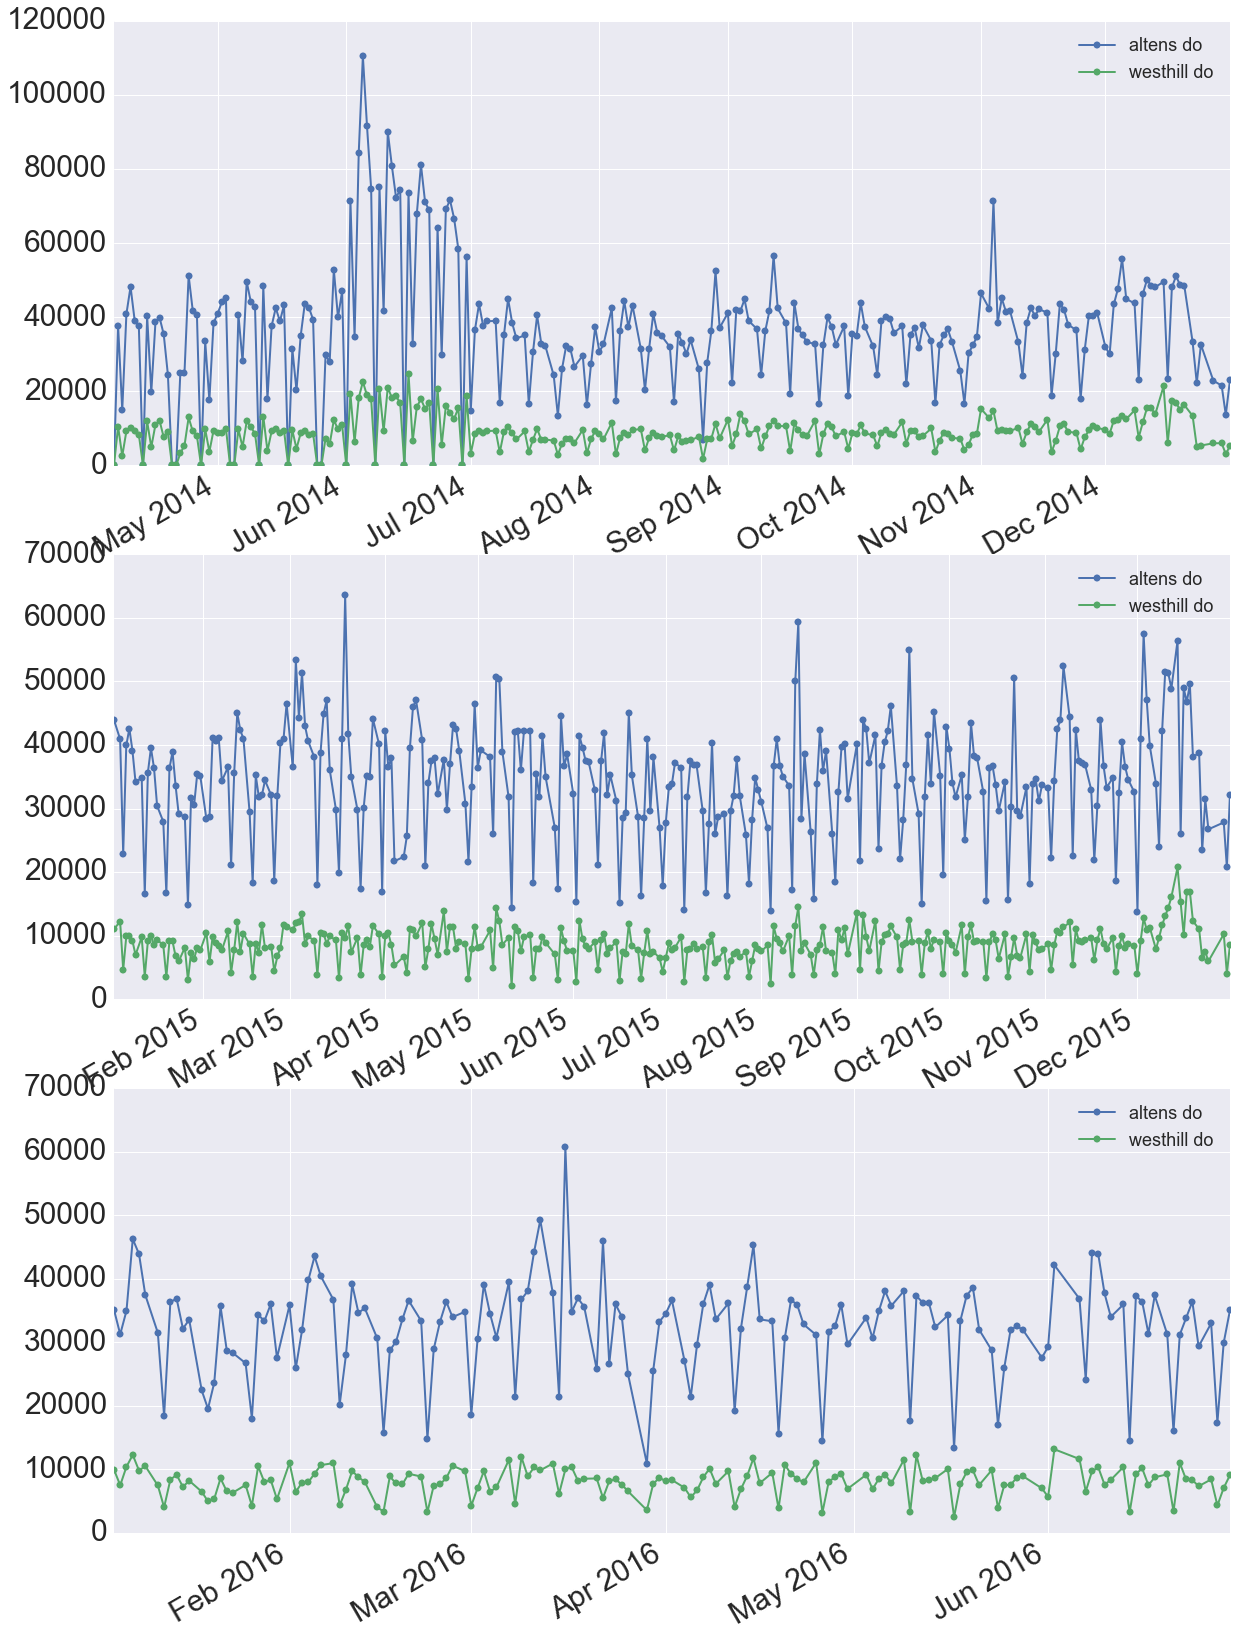

In [52]:
# If it failed try again, some do don't have the T0076 stream in this MC for some reason
list_dos_i_want_to_plot = aberdeen.get_random_dos(size=2)
aberdeen.plot_DO(list_dos_i_want_to_plot,target='stream',name='T0076')

100%|██████████| 18/18 [00:01<00:00,  9.64it/s]


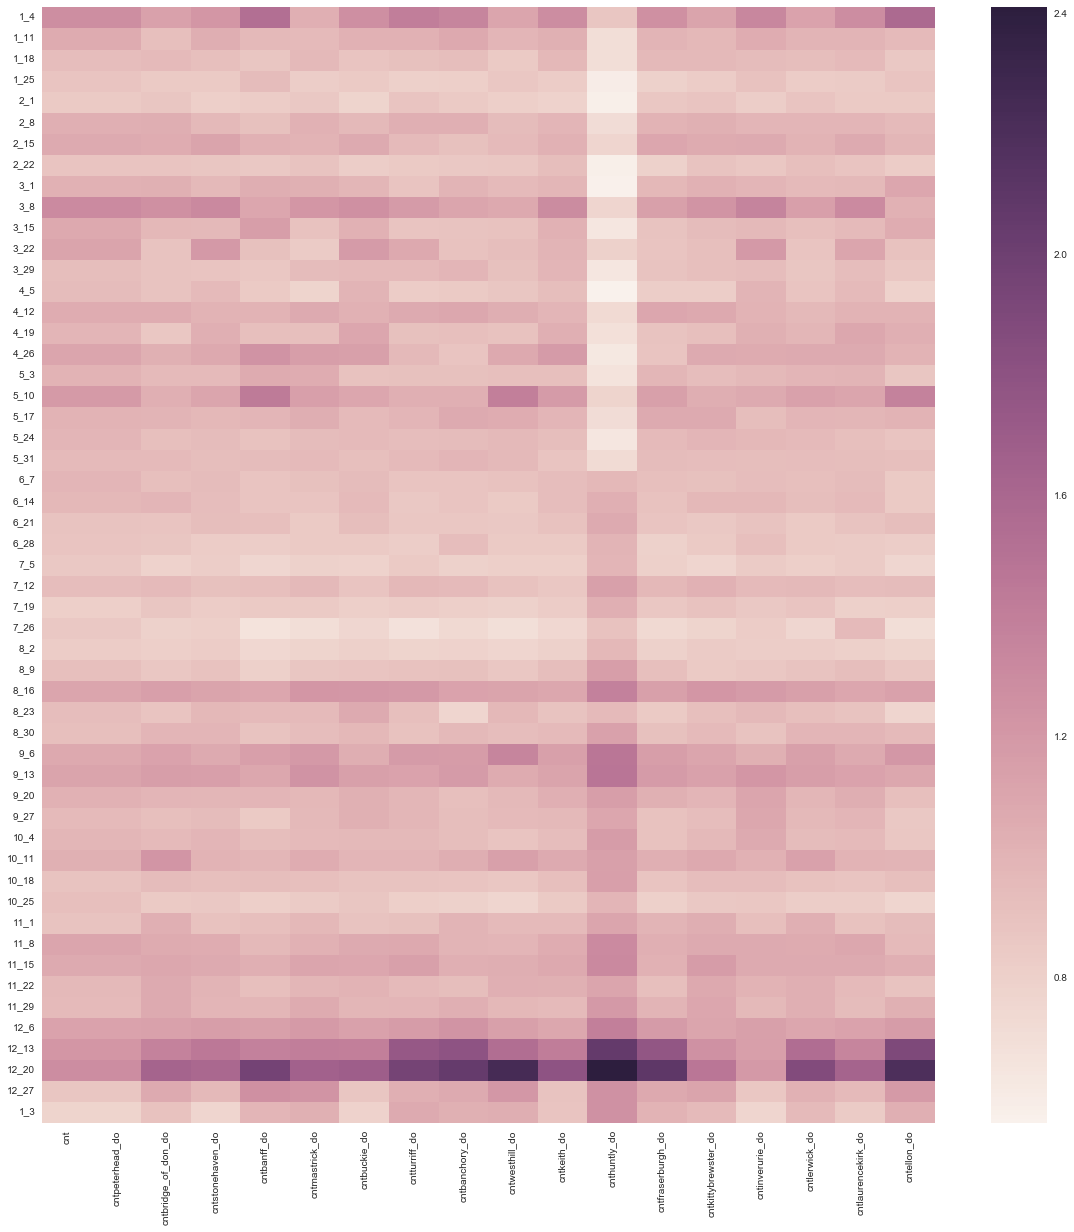

In [55]:
# Plot a heat map of the count for a specific year and a specific stream
# Basically, it plots a matrix with all days (all week if resample is True)
# on the y axis and all do on the x axis.
df = aberdeen.plot_heatmap(stream='T0076', year='2015', resample=True)

Chritmas is busy !!

# Stream 

This class is the most important and provide different method to look at the scale of a single triple (MC,DO,stream)

In [59]:
# let's look at the stream T0076 of the altens do in the aberdeen mail centre
st = Stream(MC='aberdeen mail centre',DO='altens do',stream='T0076')
# Before going further, if you are bored on the loading time for each triple, you can also use
# the following to dump all dataframe in the processed folder. 
# Then Stream class is goign to load in no time, whatever the triple your are considering.
# Let's do it
rm.dump_all_triples()

100%|██████████| 12894/12894 [04:57<00:00, 43.32it/s]


In [63]:
#looking at another stream now, fast!
st = Stream(MC='aberdeen mail centre',DO='altens do',stream='T0093')

In [78]:
# let's go back to T0076
st = Stream(MC='aberdeen mail centre',DO='altens do',stream='T0076')

In [69]:
# the df is located in the rawdf attribute
st.rawdf.head(10)

,stream,mail,MC,DO,cnt,date,day
2014-04-01,NaN,NaN,NaN,NaN,NaN,NaT,Tuesday
2014-04-02,NaN,NaN,NaN,NaN,NaN,NaT,Wednesday
2014-04-03,NaN,NaN,NaN,NaN,NaN,NaT,Thursday
2014-04-04,NaN,NaN,NaN,NaN,NaN,NaT,Friday
2014-04-05,NaN,NaN,NaN,NaN,NaN,NaT,Saturday
2014-04-06,T0076,letters,aberdeen mail centre,altens do,0.0,2014-04-06,Sunday
2014-04-07,T0076,letters,aberdeen mail centre,altens do,37676.0,2014-04-07,Monday
2014-04-08,T0076,letters,aberdeen mail centre,altens do,14883.0,2014-04-08,Tuesday
2014-04-09,T0076,letters,aberdeen mail centre,altens do,40847.0,2014-04-09,Wednesday
2014-04-10,T0076,letters,aberdeen mail centre,altens do,48222.0,2014-04-10,Thursday


In [71]:
#By default, we join the available record to complet calendar for the desired period
#which explain why they are a lot of NaN
st.inspect_df(st.rawdf)

--------------------------------------------------
Expected/given df length
--------------------------------------------------
The expeted length on 2014 with bank holliday,sunday.. is 275
The length on 2014 is actually 275
--------------------------------------------------
The expeted length on 2015 with bank holliday,sunday.. is 365
The length on 2015 is actually 365
--------------------------------------------------
The expeted length on 2016 with bank holliday,sunday.. is 182
The length on 2016 is actually 182


You can decide to clean up the ts as you want.
We ussually scikit-learn which are very flexible and convenient for that.
Take a look [blog](http://zacstewart.com/2014/08/05/pipelines-of-featureunions-of-pipelines.html) for more information of how to use pipeline.

We implement several of them in the src/model/transformer.py file. 

In [77]:
from sklearn.pipeline import Pipeline
# Remove outlier as explained in the presentation
# For instance, if we want to clean everything over 2 sigma deviantion from the mean
Outlier = RemoveOutlierTransformer(z=2,data=st.rawdf,DO=st.DO)

Before playing with this transformer, we need to create a new file in the data/processed folder which references bank holliday. Given that you have the second version of the BH file that Nick gave us in the data/raw folder named **DOsandBOv2.csv**, you can do as followed

In [83]:
from src.data.helper import dump_bank_holliday
dump_bank_holliday()

100%|██████████| 3/3 [00:00<00:00, 15.99it/s]

Dump bank hollday


In [87]:
# Then we can fit the transformer to the whole data
Outlier.fit(st.rawdf)

RemoveOutlierTransformer(DO='altens do',
             data=           stream     mail                    MC         DO      cnt  \
2014-04-01    NaN      NaN                   NaN        NaN      NaN
2014-04-02    NaN      NaN                   NaN        NaN      NaN
2014-04-03    NaN      NaN                   NaN        NaN      NaN
2014-04...sday
2016-06-29 2016-06-29  Wednesday
2016-06-30 2016-06-30   Thursday

[822 rows x 7 columns],
             z=2)

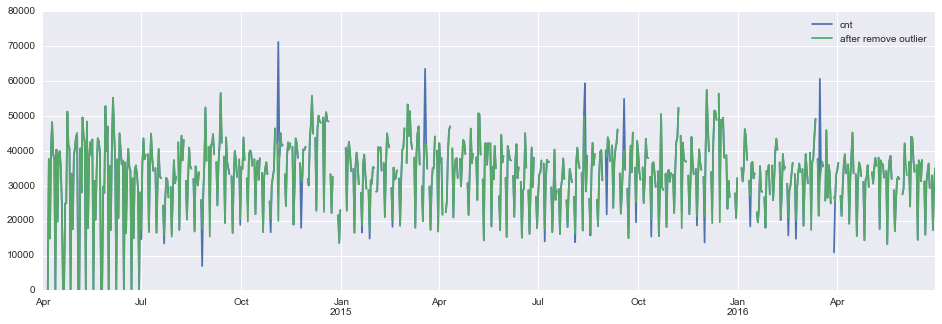

In [96]:
st.rawdf.plot(label='Before processing',figsize=(16,5))
Outlier.transform(st.rawdf).plot(label='after remove outlier')
plt.legend()

We develop many of these transform that you can play around with in the src/model/transformer.py files which also comes with some sort of docummentation. These are very useful when you pipe them together with the **Pipeline instance** of sklean. 

A classic pipeline we use is the following:

- Deal with outlier
- Remove Sundays from the dataset
- Set BH to 0 
- Fill remaining Nan values with the mean of the time series

In [99]:
# A classic pipeline we used is:
pipeline =  Pipeline([
            ('DealWithOutlierTransformer', RemoveOutlierTransformer(z=2,data=st.rawdf,DO=st.DO)),
            ('SundayRemover', SundayRemover()),
            ('BankHollidayTransformer', BankHollidayTransformer(st.DO)),
            ('SimpleFillInputer', SimpleFillInputer(st.rawdf.cnt.mean()))])
pipeline.fit(st.rawdf)

Pipeline(steps=[('DealWithOutlierTransformer', RemoveOutlierTransformer(DO='altens do',
             data=           stream     mail                    MC         DO      cnt  \
2014-04-01    NaN      NaN                   NaN        NaN      NaN
2014-04-02    NaN      NaN                   NaN        NaN   ...kHollidayTransformer(DO='altens do')), ('SimpleFillInputer', SimpleFillInputer(fill=33262.8647482))])

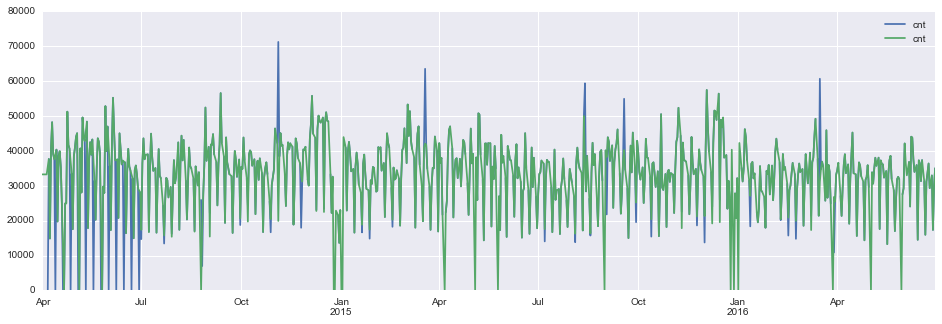

In [103]:
fig = plt.figure(figsize=(16,5))
ax=plt.subplot()
st.rawdf.plot(label='Before processing',ax=ax)
pipeline.transform(st.rawdf.cnt).plot(label='after remove outlier',ax=ax)
plt.legend()

# Forecasting with R 

The two last transformer of the src/model/transformer.py file are actually to use the forecast package of R for the forecast. To use them, you have to 

- Make sure you have R installed on your machine along with rpy2



## Forecasting for one (MC,DO,stream) 

In [156]:
# Forecasting with R
## First we need to obtain a trai/test split of the data
## I usually set env variable in the setting.py file at the root of the folder to setup the start/end date of the train/test split
print('Start training date {}'.format(START_TRAINING_DATE))
print('End training date {}'.format(END_TRAINING_DATE))
print('Start test date {}'.format(START_TESTING_DATE))
print('End test date {}'.format(END_TESTING_DATE))

Start training date 2014-04-06
End training date 2016-04-11
Start test date 2016-04-12
End test date 2016-06-30


Let's use the dataset until the 11 of April for training and forecast from the 12 of April to the 30 of June.

In [157]:
# Stream class possess a train_test_split method that use these env variables to split the rawdf
train,test = st.train_test_split()
# next we reuse the pipeline we used before, but we fit it only using the train set
pipeline.fit(train)
# processed train/test
train = pipeline.transform(train)
test = pipeline.transform(test)

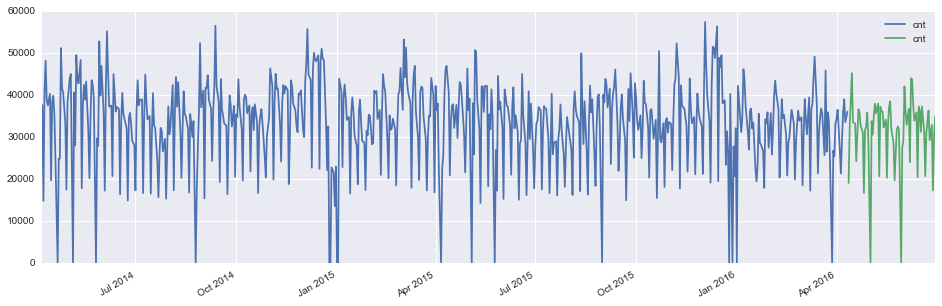

In [120]:
fig = plt.figure(figsize=(16,5))
ax=plt.subplot()
train.plot(ax=ax)
test.plot(ax=ax)
# We try to forecast the green thing !

In [135]:
from src.model.transformer import STLEstimator
# Precise dump=True if you want to dump the forecast in the model/STL_MODEL folder 
# The stl is a model in the R forecast package which basically remove the seasonality and fit 
# an exponential smoothing model to forecast.
stl = STLEstimator(MC=st.MC,DO=st.DO,stream=st.stream,dump=True)

In [137]:
# Fit the model and dump the forecast
stl.fit(train)

STLEstimator(DO='altens do', MC='aberdeen mail centre', dump=True,
       stream='T0076')

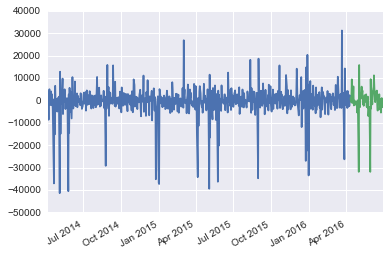

In [141]:
# To obtain the residual for the training
stl.transform(train).plot()
# To obtain the residual for the testing
stl.transform(test).plot()
# As expected, it fails nicely around BHolidays!

In [144]:
# Two files have been created in the STL_MODEL folder of the model dir to store the result.
os.listdir(STL_MODEL)

['aberdeen_mail_centre_altens_do_T0076.test',
 'aberdeen_mail_centre_altens_do_T0076.train']

In [153]:
#fitted value on the train set
fitted_values = pd.read_csv(os.path.join(STL_MODEL,'aberdeen_mail_centre_altens_do_T0076.test'),
                            parse_dates=['date'],
                            date_parser=lambda x: pd.to_datetime(x, format='%Y/%m/%d')).set_index('date')
#forecast value for the test set
forecast = pd.read_csv(os.path.join(STL_MODEL,'aberdeen_mail_centre_altens_do_T0076.test'),
                       parse_dates=['date'],
                       date_parser=lambda x: pd.to_datetime(x, format='%Y/%m/%d')).set_index('date')

In [154]:
forecast.head()

,ytrue,yhat,Lo80,Hi80,Lo95,Hi95,MC,DO,stream
date,,,,,,,,,
2016-04-12,19129.0,18105.946281,7693.404162,28518.488400,2181.337322,34030.555240,aberdeen mail centre,altens do,T0076
2016-04-13,32145.0,32925.997525,22293.252148,43558.742902,16664.616745,49187.378305,aberdeen mail centre,altens do,T0076
2016-04-14,38731.0,37966.508718,27118.028865,48814.988571,21375.190529,54557.826907,aberdeen mail centre,altens do,T0076
2016-04-15,45249.0,35903.626017,24843.618965,46963.633069,18988.804894,52818.447140,aberdeen mail centre,altens do,T0076
2016-04-16,33587.0,34802.994564,23535.430637,46070.558492,17570.742593,52035.246535,aberdeen mail centre,altens do,T0076


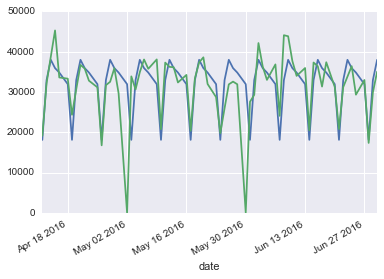

In [155]:
forecast.yhat.plot()
forecast.ytrue.plot()

## Forecasting for everyone with R

In [ ]:
# To proceed for all the DO, just fo a loop over all of (MC,DO,stream)
triples = rm.df[['MC','DO','stream']].drop_duplicates()
triples.index= range(len(triples))
for triple in tqdm(triples.itertuples(index=False),total=len(triples)):
    st = Stream(MC=triple.MC,DO=triple.DO,stream=triple.stream)
    # Stream class possess a train_test_split method that use these env variables to split the rawdf
    train,test = st.train_test_split()
    # next we reuse the pipeline we used before, but we fit it only using the train set
    pipeline.fit(train)
    # processed train/test
    train = pipeline.transform(train)
    test = pipeline.transform(test)
    
    stl = STLEstimator(MC=st.MC,DO=st.DO,stream=st.stream,dump=True)
    # Fit the model and dump the forecast
    stl.fit(train)

It will take about 4 hour depending on your hardware to process everything.

# Forecasting using machine learning  

To forecast using machine learning, we have to reframe the time series into a feature matrix!

Several transformer are implemented in the src/model/mimo_transformer.py file to do that. 

The class **AgregatedDataFeature** in the src/model/base_data.py is here to handle the creation and dumping of the feature matrix and corresponding label. 

To create the feature for some specifc (MC,DO,stream), you can use
- src/model/run_feature.py

Once the feature are created, you can use

- src/model/run_randomforest.py
- src/model/run_extratree.py 

to train the model and produce the forecast for these models. However, I think I have been might too far in a way and I am running out of time to explain that in a notebook. Hope the remaining is still usefull.